In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

In [3]:
# 1.

data = [(160, 'F'), (165, 'F'), (155, 'F'), (172, 'F'), (175, 'B'), (180, 'B'), (177, 'B'), (190, 'B')]
train_data = [[p[0]] for p in data]
train_labels = [p[1] for p in data]

# transform continuous values to discrete values
# return evenly spaced numbers over a specified interval [start, stop], with num samples
bins = np.linspace(start=150, stop=190, num=5)
print(bins)

[150. 160. 170. 180. 190.]


In [4]:
x = 178
# np.digitize returns the indices of the bins to which each value in input array belongs.
x_to_bins = np.digitize(x, bins, right = True)
print(x_to_bins)

3


In [5]:
n = len(train_labels)
nb = len([p for p in train_labels if p[0] == 'B'])
ng = len([p for p in train_labels if p[0] == 'F'])

pb = nb/n
pg = ng/n

pxb = len([p for p in data if p[1] == 'B' and np.digitize(p[0], bins, right = True) == x_to_bins])/nb
pxg = len([p for p in data if p[1] == 'F' and np.digitize(p[0], bins, right = True) == x_to_bins])/ng
px = len([p for p in train_data if np.digitize(p[0], bins, right = True) == x_to_bins])/n
print([pb, pg, pxb, pxg, px])

[0.5, 0.5, 0.75, 0.25, 0.5]


In [6]:
# probability to be a boy
pbx = pb * pxb / px
print(pbx)

0.75


In [7]:
# probability to be a girl
pgx = pg * pxg / px
print(pgx)

0.25


In [8]:
# 2.
# load images
train_images = np.loadtxt('E:\\facultate\Anul 2, sem II\IA\ML\lab2\data\\train_images.txt') 
# load labels as int
train_labels = np.loadtxt('E:\\facultate\Anul 2, sem II\IA\ML\lab2\data\\train_labels.txt').astype(np.int64)

print(train_images)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
print(np.shape(train_images))

(1000, 784)


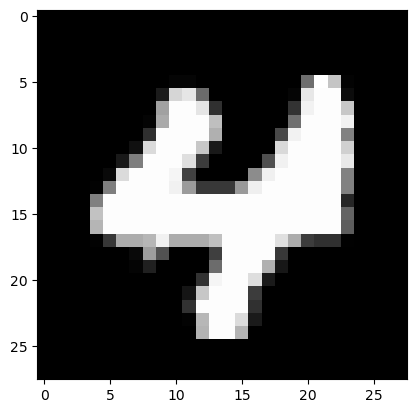

In [10]:
# first image
image = train_images[0, :]
image = np.reshape(image, (28, 28))
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.show()

In [11]:
# load images
test_images = np.loadtxt('E:\\facultate\Anul 2, sem II\IA\ML\lab2\data\\test_images.txt') 
# load labels as int
test_labels = np.loadtxt('E:\\facultate\Anul 2, sem II\IA\ML\lab2\data\\test_labels.txt').astype(np.int64)


def values_to_bins(matrix, num_bins):
    bins = np.linspace(start=0, stop=256, num = num_bins)
    return np.digitize(matrix, bins) - 1

In [12]:
discrete_train = values_to_bins(train_images, 5)
print(discrete_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
discrete_test = values_to_bins(test_images, 5)
print(discrete_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
# 3.
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(discrete_train, train_labels)
score = naive_bayes_model.score(discrete_test, test_labels)
print(f"Naive Bayes score: {score}")

Naive Bayes score: 0.836


In [15]:
# 4.
num_bins = [3, 5, 7, 9, 11]
for n in num_bins:
    print(f"Number of bins: {n}")
    discrete_train = values_to_bins(train_images, n)
    discrete_test = values_to_bins(test_images, n)
    naive_bayes_model = MultinomialNB()
    naive_bayes_model.fit(discrete_train, train_labels)
    score = naive_bayes_model.score(discrete_test, test_labels)
    print(f"Score: {score}")   

Number of bins: 3
Score: 0.83
Number of bins: 5
Score: 0.836
Number of bins: 7
Score: 0.842
Number of bins: 9
Score: 0.842
Number of bins: 11
Score: 0.842


In [20]:
# 5.
discrete_train = values_to_bins(train_images, 11)
discrete_test = values_to_bins(test_images, 11)
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(discrete_train, train_labels)
predictions = naive_bayes_model.predict(discrete_test)
print(predictions)


[2 7 3 1 2 2 0 8 1 4 7 3 2 0 8 3 8 9 9 1 8 2 0 0 5 9 6 2 6 7 3 2 4 9 6 6 1
 7 5 3 0 1 8 2 2 1 3 7 9 6 7 6 7 7 9 7 3 1 2 1 7 8 0 8 8 3 1 6 0 5 8 8 6 3
 2 4 4 0 9 1 9 4 3 3 1 4 0 5 7 9 0 5 2 3 4 4 4 9 5 0 0 6 8 4 6 0 7 0 8 8 7
 9 3 0 5 9 5 3 5 7 3 9 9 4 8 9 3 0 8 1 0 9 2 6 6 3 7 0 2 8 7 0 4 2 1 3 1 3
 5 3 9 3 0 0 3 6 3 2 0 1 6 4 3 2 8 2 4 4 7 8 5 3 7 4 2 8 0 0 0 3 1 6 6 2 5
 2 9 2 9 3 5 2 7 0 0 3 7 8 6 7 8 7 0 5 3 2 8 2 4 7 8 9 4 9 8 0 7 6 3 9 2 5
 6 0 1 9 6 0 2 5 9 5 8 4 1 4 6 2 6 9 4 9 5 2 4 5 3 8 3 8 8 8 1 0 4 8 8 9 3
 4 4 8 9 0 1 7 7 4 5 0 1 3 7 5 6 9 2 1 2 8 9 6 8 4 6 9 0 5 3 3 5 6 6 5 8 2
 9 3 6 1 1 7 0 8 8 3 2 1 0 0 8 0 0 1 1 6 9 2 4 2 7 0 8 8 4 1 7 2 4 2 0 9 6
 1 3 9 9 0 0 4 6 7 1 0 1 3 2 5 5 3 2 9 1 6 6 8 9 4 1 3 9 0 5 4 3 4 1 3 1 2
 4 2 4 2 2 3 4 4 7 1 3 7 6 5 7 9 3 0 8 4 9 9 9 6 2 2 1 5 6 6 7 9 9 3 5 4 1
 1 3 5 5 6 5 9 0 0 9 2 2 9 2 7 3 9 7 2 0 9 7 0 3 1 7 8 4 2 2 7 3 3 2 9 3 2
 3 0 9 9 9 3 4 3 1 1 2 2 4 8 6 6 0 1 2 1 6 1 7 6 1 1 4 3 1 1 6 8 7 8 5 1 9
 8 6 7 3 3 0 6 0 3 5 1 3 

In [17]:
print(predictions == test_labels)

[ True  True  True  True  True  True  True False  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True False  True  True
  True  True  True False  True  True False  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True False
  True  True  True False False  True  True  True False  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True False  True  True  True False  True  True False  True
  True  True  True  True False  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True False False  True False False  True  True  True  True  True
  True  True  True  True  True  True  True  True Fa

In [18]:
wrongPredictions = np.where((predictions == test_labels) == False)
print(wrongPredictions[0])

[  7  13  25  33  39  42  54  63  71  75  76  80  83 109 111 115 118 124
 128 141 146 147 149 150 164 165 166 171 188 191 211 213 214 215 233 235
 237 241 246 256 260 261 262 271 274 281 283 304 306 326 331 334 335 336
 343 354 360 365 367 372 377 384 385 386 406 416 423 430 433 439 443 446
 448 457 463 489 492 493 496]


This image was wrongly classified as the number 8:


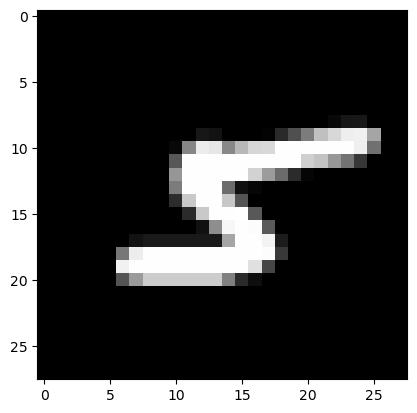

This image was wrongly classified as the number 0:


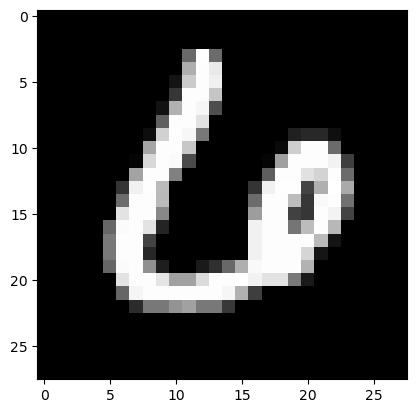

This image was wrongly classified as the number 9:


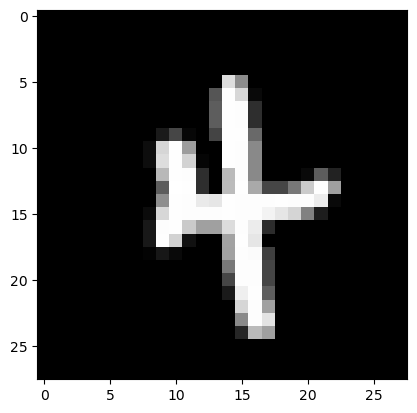

This image was wrongly classified as the number 9:


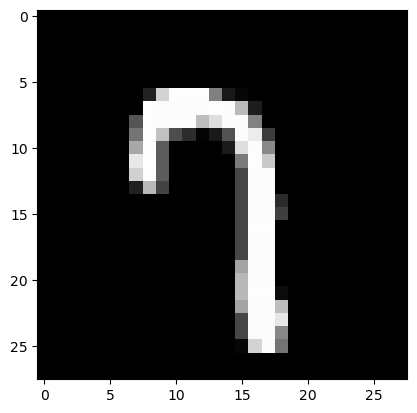

This image was wrongly classified as the number 3:


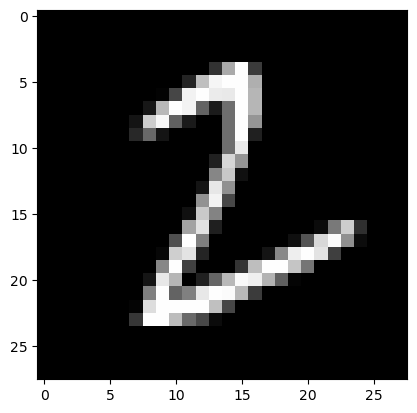

This image was wrongly classified as the number 8:


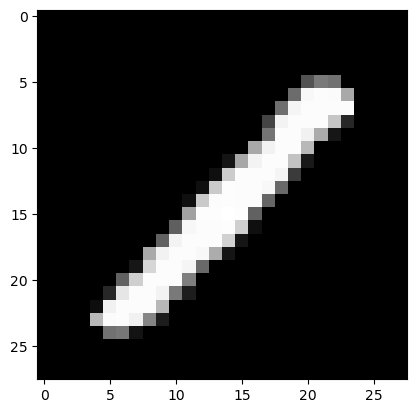

This image was wrongly classified as the number 9:


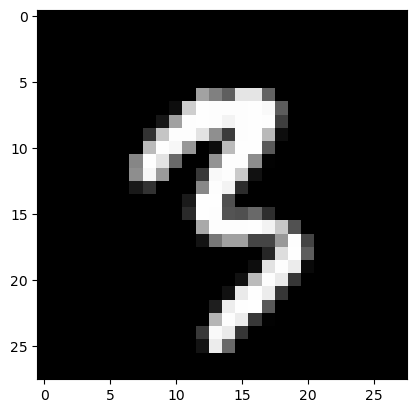

This image was wrongly classified as the number 8:


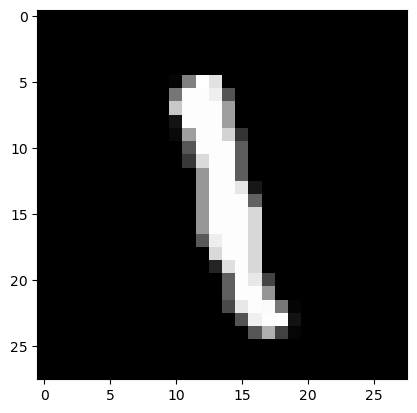

This image was wrongly classified as the number 8:


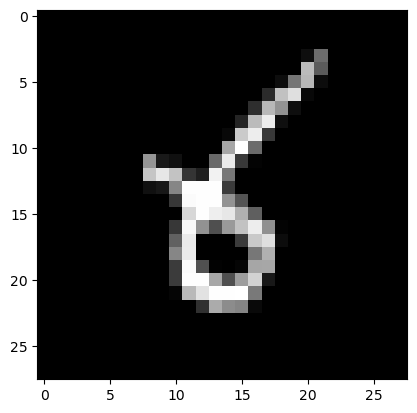

This image was wrongly classified as the number 4:


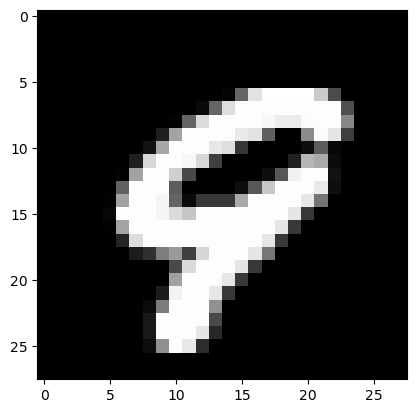

This image was wrongly classified as the number 4:


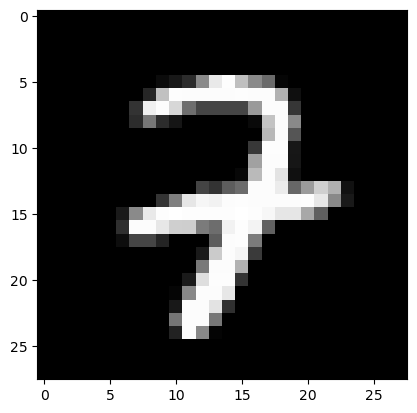

In [19]:
cnt = 0
for i in wrongPredictions[0]:
    if cnt > 10:
        break
    print(f"This image was wrongly classified as the number {predictions[i]}:")
    image = test_images[i, :]
    image = np.reshape(image, (28, 28))
    plt.imshow(image.astype(np.uint8), cmap='gray')
    plt.show()
    cnt += 1

In [33]:
# 6.
confusion_matrix = []
for i in range(10):
    current = [0]*10
    index = (np.where(test_labels == i))[0]
    for j in index:
        current[predictions[j]] += 1
    confusion_matrix.append(current)

confusion_matrix = np.array(confusion_matrix)
print(confusion_matrix)

[[51  0  0  0  0  0  1  0  1  0]
 [ 0 48  0  0  0  0  1  0  3  0]
 [ 2  0 51  1  1  0  0  1  1  1]
 [ 0  0  1 49  0  0  0  0  0  3]
 [ 0  0  0  0 34  0  0  0  2 10]
 [ 1  0  0  9  0 35  1  0  5  1]
 [ 1  1  0  0  1  0 43  0  2  0]
 [ 0  1  0  0  2  0  0 41  0  6]
 [ 0  1  3  3  1  1  1  1 34  1]
 [ 0  0  1  1  5  0  0  0  0 35]]


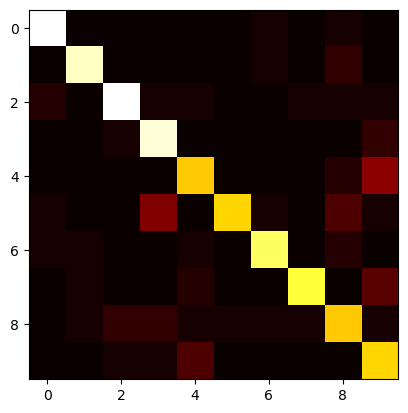

In [34]:
plt.imshow(confusion_matrix, cmap='hot', interpolation='nearest')
plt.show()